In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("hand_features3.csv")

In [ ]:
df.head(10)

,rhythm_ms,speed_px_per_sec,amplitude_norm,num_taps,video
0,71.449518,0.453955,7.782905,30,10222_11052025093743_f5d91ede-f155-11ec-9211-e...
1,17.817416,0.827351,4.762737,8,1428_10052025201556_ccf71a4a-5f42-11ed-9161-e8...
2,74.445405,0.618648,0.846606,62,1374_10052025201359_c4c6c6cc-59c4-11ed-afbc-e8...
3,60.438215,0.295369,6.938820,41,1165_10052025200540_a893fecc-5449-11ed-a18d-e8...
4,139.942845,0.641130,2.432114,51,1372_10052025201355_c48bdf76-85cb-11ed-a21f-e8...
5,41.317052,0.445035,3.276118,61,1436_10052025201612_cdb9c5e8-7d1d-11ed-b03c-e8...
6,49.881348,0.422529,1.237249,32,10004_11052025090223_e75ca698-34ee-11ed-b745-e...
7,135.564663,0.384836,2.708674,41,10172_11052025092911_f26f15ca-f7a1-11ec-9a77-b...
8,248.451997,0.372205,9.426007,10,1335_10052025201220_c018367e-e0bf-11ec-b470-e8...
9,40.592736,0.326288,5.794588,43,1177_10052025200606_aa44dc3a-493f-11ed-8f26-e8...


In [ ]:
X = df[['rhythm_ms', 'speed_px_per_sec', 'amplitude_norm']]
X.head()

,rhythm_ms,speed_px_per_sec,amplitude_norm
0,71.449518,0.453955,7.782905
1,17.817416,0.827351,4.762737
2,74.445405,0.618648,0.846606
3,60.438215,0.295369,6.938820
4,139.942845,0.641130,2.432114


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)  # 5 классов (0-4)
df['cluster'] = kmeans.fit_predict(X)

# Сопоставление кластеров с классами (требует проверки экспертом)
cluster_to_label = {0: 0, 1: 3, 2: 4, 3: 1, 4: 2}
df['predicted_label'] = df['cluster'].map(cluster_to_label)

c:\Users\da02s\anaconda3\envs\loan_pipeline\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


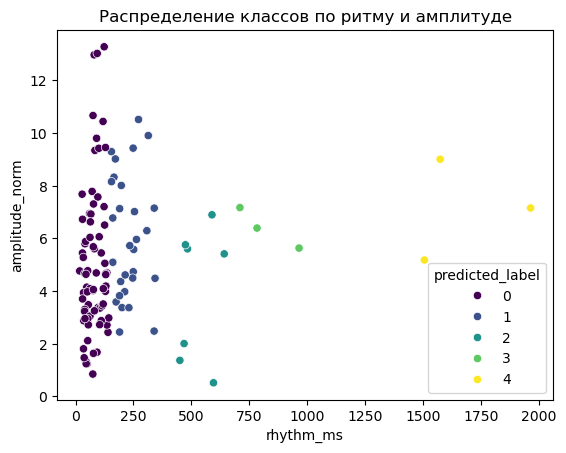

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Диаграмма рассеяния для 2 признаков
sns.scatterplot(data=df, x='rhythm_ms', y='amplitude_norm', hue='predicted_label', palette='viridis')
plt.title('Распределение классов по ритму и амплитуде')
plt.show()